In [1]:
import numpy as np
import quandl
import pandas as pd

quandl.ApiConfig.api_key = "MYQUANDLAPIKEY"
t=6
T=24
rf = 0.01

In [2]:
spy = quandl.get("YALE/SPCOMP", start_date = "2000-01-01")

del spy["Dividend"], spy["Earnings"], spy["CPI"], spy["Long Interest Rate"], spy["Real Price"], spy["Real Dividend"], spy["Real Earnings"], spy["Cyclically Adjusted PE Ratio"]

spy["S&P Composite"].plot(figsize = (20,6))

In [3]:
spy.head()

,S&P Composite
Year,
2000-01-31,1425.59
2000-02-29,1388.87
2000-03-31,1442.21
2000-04-30,1461.36
2000-05-31,1418.48


In [4]:
spy.tail()

,S&P Composite
Year,
2019-04-30,2903.80
2019-05-31,2854.71
2019-06-30,2890.17
2019-07-31,2996.11
2019-08-31,2883.98


In [5]:
spy["MA_Short"] = spy["S&P Composite"].rolling(t).mean()
spy["MA_Long"] = spy["S&P Composite"].rolling(T).mean()

spy["Position"] = np.where(spy["MA_Short"]>spy["MA_Long"],1,0)
spy["Position"].shift(1)


Year
2000-01-31    NaN
2000-02-29    0.0
2000-03-31    0.0
2000-04-30    0.0
2000-05-31    0.0
2000-06-30    0.0
2000-07-31    0.0
2000-08-31    0.0
2000-09-30    0.0
2000-10-31    0.0
2000-11-30    0.0
2000-12-31    0.0
2001-01-31    0.0
2001-02-28    0.0
2001-03-31    0.0
2001-04-30    0.0
2001-05-31    0.0
2001-06-30    0.0
2001-07-31    0.0
2001-08-31    0.0
2001-09-30    0.0
2001-10-31    0.0
2001-11-30    0.0
2001-12-31    0.0
2002-01-31    0.0
2002-02-28    0.0
2002-03-31    0.0
2002-04-30    0.0
2002-05-31    0.0
2002-06-30    0.0
             ... 
2017-03-31    1.0
2017-04-30    1.0
2017-05-31    1.0
2017-06-30    1.0
2017-07-31    1.0
2017-08-31    1.0
2017-09-30    1.0
2017-10-31    1.0
2017-11-30    1.0
2017-12-31    1.0
2018-01-31    1.0
2018-02-28    1.0
2018-03-31    1.0
2018-04-30    1.0
2018-05-31    1.0
2018-06-30    1.0
2018-07-31    1.0
2018-08-31    1.0
2018-09-30    1.0
2018-10-31    1.0
2018-11-30    1.0
2018-12-31    1.0
2019-01-31    1.0
2019-02-28    1.0
2019-

In [6]:
spy.head()

,S&P Composite,MA_Short,MA_Long,Position
Year,,,,
2000-01-31,1425.59,NaN,NaN,0
2000-02-29,1388.87,NaN,NaN,0
2000-03-31,1442.21,NaN,NaN,0
2000-04-30,1461.36,NaN,NaN,0
2000-05-31,1418.48,NaN,NaN,0


In [7]:
spy.tail()

,S&P Composite,MA_Short,MA_Long,Position
Year,,,,
2019-04-30,2903.80,2726.761667,2668.901667,1
2019-05-31,2854.71,2748.675000,2688.041667,1
2019-06-30,2890.17,2802.485000,2707.049167,1
2019-07-31,2996.11,2867.271667,2729.632917,1
2019-08-31,2883.98,2888.791667,2747.456250,1


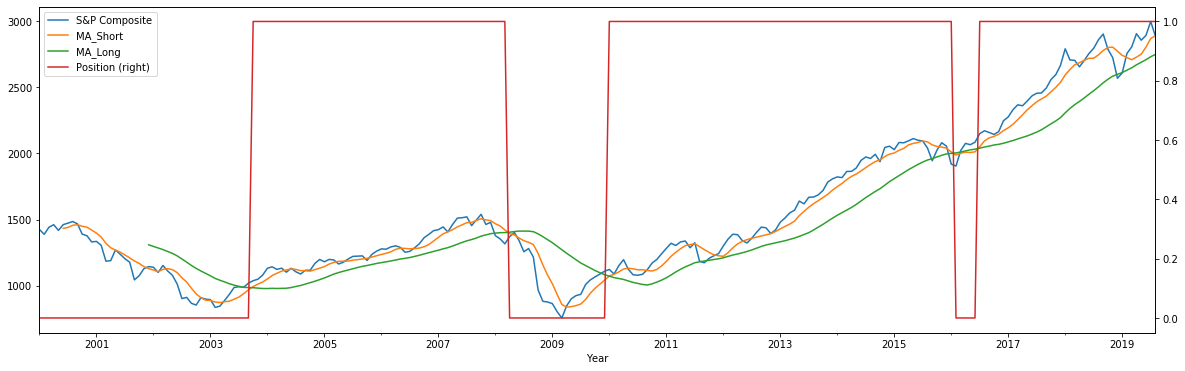

In [8]:
spy[["S&P Composite", "MA_Short", "MA_Long", "Position"]].plot(figsize = (20,6), secondary_y = "Position")

In [9]:
spy["Baseline_Return"] = np.log(spy["S&P Composite"]/spy["S&P Composite"].shift(1))
spy["Strategy_Return"] = spy["Baseline_Return"] * spy["Position"]

spy["Baseline_cumReturn"] = spy["Baseline_Return"].cumsum()
spy["Strategy_cumReturn"] = spy["Strategy_Return"].cumsum()

spy.dropna(inplace = True)

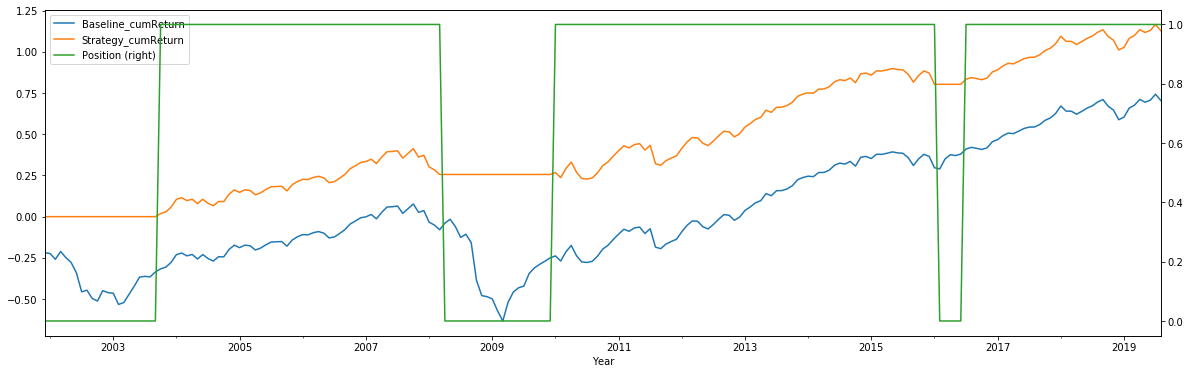

In [10]:
spy[["Baseline_cumReturn", "Strategy_cumReturn", "Position"]].plot(figsize = (20,6), secondary_y = "Position")

In [11]:
spy.head()

,S&P Composite,MA_Short,MA_Long,Position,Baseline_Return,Strategy_Return,Baseline_cumReturn,Strategy_cumReturn
Year,,,,,,,,
2001-12-31,1144.93,1129.798333,1309.542917,0,0.013409,0.0,-0.219242,0.0
2002-01-31,1140.21,1119.091667,1297.652083,0,-0.004131,-0.0,-0.223373,0.0
2002-02-28,1100.67,1106.120000,1285.643750,0,-0.035293,-0.0,-0.258667,0.0
2002-03-31,1153.79,1124.311667,1273.626250,0,0.047133,0.0,-0.211534,0.0
2002-04-30,1111.93,1130.201667,1259.066667,0,-0.036955,-0.0,-0.248489,0.0


In [12]:
spy.tail()

,S&P Composite,MA_Short,MA_Long,Position,Baseline_Return,Strategy_Return,Baseline_cumReturn,Strategy_cumReturn
Year,,,,,,,,
2019-04-30,2903.80,2726.761667,2668.901667,1,0.034980,0.034980,0.711434,1.134735
2019-05-31,2854.71,2748.675000,2688.041667,1,-0.017050,-0.017050,0.694384,1.117685
2019-06-30,2890.17,2802.485000,2707.049167,1,0.012345,0.012345,0.706730,1.130030
2019-07-31,2996.11,2867.271667,2729.632917,1,0.035999,0.035999,0.742729,1.166029
2019-08-31,2883.98,2888.791667,2747.456250,1,-0.038143,-0.038143,0.704586,1.127886


In [13]:
Baseline_return = spy["Baseline_Return"].mean()
Baseline_annualReturn = Baseline_return * 12

Strategy_return = spy["Strategy_Return"].mean()
Strategy_annualReturn = Strategy_return * 12

Baseline_std = spy["Baseline_Return"].std()
Baseline_annualStd = Baseline_std * np.sqrt(12)

Strategy_std = spy["Strategy_Return"].std()
Strategy_annualStd = Strategy_std * np.sqrt(12)

In [14]:
Baseline_SR = (Baseline_annualReturn - rf)/Baseline_annualStd
Strategy_SR = (Strategy_annualReturn - rf)/Strategy_annualStd

Baseline_cumReturn = spy.loc["2019-08-31"].at['Baseline_cumReturn']
Strategy_cumReturn = spy.loc["2019-08-31"].at['Strategy_cumReturn']

In [15]:
spy[["S&P Composite", "MA_Short", "MA_Long", "Position", "Baseline_cumReturn", "Strategy_cumReturn"]]

,S&P Composite,MA_Short,MA_Long,Position,Baseline_cumReturn,Strategy_cumReturn
Year,,,,,,
2001-12-31,1144.93,1129.798333,1309.542917,0,-0.219242,0.000000
2002-01-31,1140.21,1119.091667,1297.652083,0,-0.223373,0.000000
2002-02-28,1100.67,1106.120000,1285.643750,0,-0.258667,0.000000
2002-03-31,1153.79,1124.311667,1273.626250,0,-0.211534,0.000000
2002-04-30,1111.93,1130.201667,1259.066667,0,-0.248489,0.000000
2002-05-31,1079.25,1121.796667,1244.932083,0,-0.278319,0.000000
2002-06-30,1014.02,1099.978333,1226.267917,0,-0.340663,0.000000
2002-07-31,903.59,1060.541667,1202.542500,0,-0.455965,0.000000
2002-08-31,912.55,1029.188333,1178.671250,0,-0.446098,0.000000


In [16]:
results = {"cumReturns" : [Baseline_cumReturn, Strategy_cumReturn],
          "Sharp Ratios": [Baseline_SR, Strategy_SR]}

In [17]:
df_results = pd.DataFrame(results, index = ["Baseline", "Strategy"])

In [18]:
df_results

,cumReturns,Sharp Ratios
Baseline,0.704586,0.340873
Strategy,1.127886,0.645141
